In [1]:
import math
import certifi
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy import stats

In [2]:
ii=complex(0,1)
#number of repitions for the training 
nrand=20
#decoherence
p=0.5
th=0
#no of shots 
shots=8192
shotseff=shots/2

mean MSE iny 0.0013375869140851045
theoretical minimum MSE 0.0009937888198757764


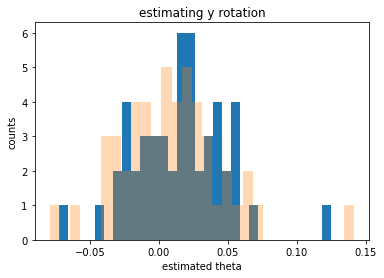

In [3]:
#final 1I data
#single qubit y DA

folder='AQTION_1QY_2Q_2021-11-03/'
folderY='_1Q_Y_2021-11-03_LR'
folderY_noEM='_1Q_Y_2021-11-03_noEM_LR'

cname='aqtion'

thvec=np.linspace(-0.2,0.2,nrand)
msetot=[]
msetotnoEC=[]

estxtot=[]
estytot=[]
estyog=[]

msexT=[]
mseyT=[]

n0finY=[]
n1finY=[]
n0finYog=[]
n1finYog=[]
#saving an nyfit vector so I can save the og number of ions and then mitigate the sub-groupings
nyfitvec=[]

for hh in range(5):
    FY = np.load(str(folder+cname+folderY+str("/")+str('run')+str(hh)+str("_1Q_est_Y_")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("training_data")+str(".npz")))
    rY = np.load(str(folder+cname+folderY+str("/")+str('run')+str(hh)+str("_1Q_est_Y_")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("nyvec")+str(".npz")))

    ay=FY['arr_0']
    resy=rY['arr_0']
    
    n0y=np.transpose(ay)[0]
    n1y=np.transpose(ay)[1]
    
    
    total_ionsY=np.mean(np.array(n0y)+np.array(n1y))

    noisy1QY=[]
    noisy1QY=1/((1-p))*(1/total_ionsY)*(ay[0]-ay[1])

    #generating theoretical data to fit the noisy data to
    True1QY=[]

    for jj in range(nrand):
        thint=thvec[jj]

        True1QY.append(thint)


    #after removing outliers calculate the mean offset, and use this as the correction term
    nyfit=np.mean(True1QY-noisy1QY)
    
    updated1QY=np.array(noisy1QY)+nyfit
    
    
    #then use the model to calculate updated single copy estimates
    n0y=np.transpose(resy)[0]
    n1y=np.transpose(resy)[1]

    total_ionsY=np.mean(np.array(n0y)+np.array(n1y))

    noisy1QY=[]
    noisy1QY=1/((1-p))*(1/total_ionsY)*(np.transpose(resy)[0]-np.transpose(resy)[1])

    #calculate the mean MSE over a certain range close to 0
    mseyb4=[]
    msey=[]
    
    updated1QY=np.array(noisy1QY)+nyfit
    #updated1QY=np.array(noisy1QY)-np.mean(noisy1QY)
    
    estytot.append(updated1QY)
    estyog.append(noisy1QY)
    
    for hh in range(10):
        mseyb4.append((noisy1QY[hh])**2)
        msey.append((updated1QY[hh])**2)
        nyfitvec.append(nyfit)

    msetot.append(msey)
    msetotnoEC.append(np.mean(mseyb4))
    
    mseyT.append(np.mean(msey))
    
    #save total ion no
    n0fin=((1-p)*total_ionsY*updated1QY+total_ionsY)/2;
    n1fin=total_ionsY-n0fin;
    n0finY.append(n0fin)
    n1finY.append(n1fin)
    
    n0finYog.append(n0y)
    n1finYog.append(n1y)

print('mean MSE iny',np.mean(mseyT))


estytot=np.reshape(estytot,[1,50])
estyog=np.reshape(estyog,[1,50])

n0finY=np.reshape(n0finY,[1,50])
n1finY=np.reshape(n1finY,[1,50])
n0finYog=np.reshape(n0finYog,[1,50])
n1finYog=np.reshape(n1finYog,[1,50])
nyfitvec=np.reshape(nyfitvec,[1,50])
nh=30

plt.figure(3)
plt.hist(estytot[0],nh)
plt.hist(estyog[0],nh,alpha=0.3)
plt.ylabel('counts')
plt.xlabel('estimated theta')
plt.title('estimating y rotation')
#plt.legend(['Original data','true theta','corrected data'])

Cn=(1)/(1-p)**2
print('theoretical minimum MSE',Cn/(total_ionsY))




3.297055103985819
3.5403464156294664
0.0013375869140851047
0.0014849896223139542
0.0010471784960425278
0.0011060142709913721


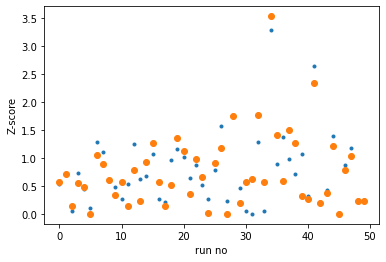

In [4]:
#removing the one outlier point from y data
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(estytot[0]))
print(np.max(z))
zog = np.abs(stats.zscore(estyog[0]))
print(np.max(zog))

plt.plot(z,'.')
plt.plot(zog,'o')
plt.ylabel('Z-score')
plt.xlabel('run no')
outlier=np.where(z>3)

esty_upd = estytot[0][(z < 3)]
esty_upd2 = estyog[0][(zog < 3)]
zupd = np.abs(stats.zscore(esty_upd))

n1finY=n1finY[0][z<3]
n0finY=n0finY[0][z<3]
n1finYog=n1finYog[0][z<3]
n0finYog=n0finYog[0][z<3]
nyfitvec=nyfitvec[0][z<3]
print(np.mean(estytot[0]**2))
print(np.mean(estyog[0]**2))
print(np.mean(esty_upd**2))
print(np.mean(esty_upd2**2))

In [5]:
print(np.size(n1finY),np.size(n0finY))
print(np.size(n1finYog),np.size(n0finYog))
print(np.size(nyfitvec))

49 49
49 49
49


In [9]:
#using the new n1 and n0 for y we can now group into sets of 512 ions 
ions=np.mean(n0finYog+n1finYog)

estyog=[]
estymit=[]
mseog=[]
msemit=[]
msealtY=[]
msealtYOG=[]
grouping=8;
ions_group=np.round(ions/grouping)
print(ions_group)
for hh in range(np.size(nyfitvec)):
    n0=n0finYog[hh]
    n1=n1finYog[hh]
    
    estyog.append(1/((1-p))*(1/ions)*(n0-n1))
    estymit.append(estyog[hh]+nyfitvec[hh])
    
    mseog.append(estyog[hh]**2)
    msemit.append(estymit[hh]**2)
    
    for outside in range(100):


        ydata= np.ones(int(ions))
        ydata[:int(n0)] = 0
        np.random.shuffle(ydata)

        for groupcount in range(grouping):
            
            ydataint=ydata[int(groupcount*ions_group):int((groupcount+1)*ions_group)]
            
            y1=np.count_nonzero(ydataint==1)
            y0=np.count_nonzero(ydataint==0)

            thy=(y0-y1)/(ions_group*(1-p))

            
            thy2=nyfitvec[hh]+thy
            
            msealtY.append((thy2-th)**2)
            msealtYOG.append((thy-th)**2)

#             estYaltMIT.append(thy2)
#             estYalt.append(thy)
    

print(np.mean(mseog))
print(np.mean(msemit))
Cn=(1)/(1-p)**2
print('theoretical minimum MSE',Cn/(ions))
print()
print('mse in y using 503 ions')
print(np.mean(msealtY))
print(np.mean(msealtYOG))
print('theoretical minimum MSE',Cn/(ions_group))

503.0
0.0011060142709913721
0.0010471784960425278
theoretical minimum MSE 0.0009937888198757764

mse in y using 503 ions
0.007902392298152636
0.007961210704693009
theoretical minimum MSE 0.007952286282306162


mean MSE over all runs 0.0009358917942980594
mean MSE over all runs without EC 0.000974352532695498
theoretical minimum MSE 0.0009937888198757764


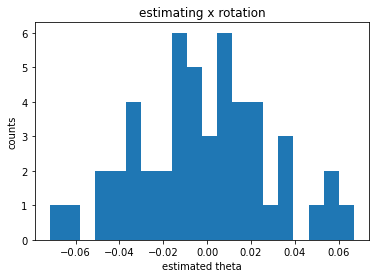

In [10]:
#single qubit x data DA

folder='AQTION_1Q_XY/'
folderX='_1Q_X_2021-10-29_LR'

cname='aqtion'

thvec=np.linspace(-0.2,0.2,nrand)
msetot=[]
msetotnoEC=[]

estxtot=[]
estytot=[]

msexT=[]
mseyT=[]
n0finX=[]
n1finX=[]
n0finXog=[]
n1finXog=[]
nxfitvec=[]
for hh in range(5):
    
    FX = np.load(str(folder+cname+folderX+str("/")+str('run')+str(hh)+str("_1Q_est_X_")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("training_data")+str(".npz")))
    rX = np.load(str(folder+cname+folderX+str("/")+str('run')+str(hh)+str("_1Q_est_X_")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("nxvec")+str(".npz")))
    
    ax=FX['arr_0']
    resx=rX['arr_0']
    
    n0x=np.transpose(ax)[0]
    n1x=np.transpose(ax)[1]

    total_ionsX=np.mean(np.array(n0x)+np.array(n1x))
    
    noisy1QX=[]
    noisy1QX=-1/((1-p))*(1/total_ionsX)*(ax[0]-ax[1])
    
    #generating theoretical data to fit the noisy data to
    True1QX=[]

    for jj in range(nrand):
        thint=thvec[jj]

        True1QX.append(thint)

    
    nxfit=np.mean(True1QX-noisy1QX)

    updated1QX=np.array(noisy1QX)+nxfit
    
    #then use the model to calculate updated single copy estimates
    n0x=np.transpose(resx)[0]
    n1x=np.transpose(resx)[1]

    total_ionsX=np.mean(np.array(n0x)+np.array(n1x))

    noisy1QX=[]
    noisy1QX=-1/((1-p))*(1/total_ionsX)*(np.transpose(resx)[0]-np.transpose(resx)[1])

    #calculate the mean MSE over a certain range close to 0
    msexb4=[]
    msex=[]

    updated1QX=np.array(noisy1QX)+nxfit
    
    estxtot.append(updated1QX)
    
    for hh in range(10):
        msexb4.append((noisy1QX[hh])**2)
        msex.append((updated1QX[hh])**2)
        nxfitvec.append(nxfit)

    msetot.append(np.mean(msex))
    msetotnoEC.append(np.mean(msexb4))
    
    #save total ion no
    n0fin=((1-p)*total_ionsX*updated1QX+total_ionsX)/2;
    n1fin=total_ionsX-n0fin;
    n0finX.append(n0fin)
    n1finX.append(n1fin)
    n0finXog.append(n0x)
    n1finXog.append(n1x)


print('mean MSE over all runs',np.mean(msetot))
print('mean MSE over all runs without EC',np.mean(msetotnoEC))

n0finX=np.reshape(n0finX,[1,50])
n1finX=np.reshape(n1finX,[1,50])
n0finXog=np.reshape(n0finXog,[1,50])
n1finXog=np.reshape(n1finXog,[1,50])
estxtot=np.reshape(estxtot,[1,50])

nh=20
plt.figure(2)
plt.hist(estxtot[0],nh)
plt.ylabel('counts')
plt.xlabel('estimated theta')
plt.title('estimating x rotation')

Cn=(1)/(1-p)**2
print('theoretical minimum MSE',Cn/(total_ionsX))



In [11]:
#using the new n1 and n0 for x we can now group into sets of 512 ions 
ions=np.mean(n0finXog+n1finXog)

estxog=[]
estxmit=[]
mseog=[]
msemit=[]
msealtX=[]
msealtXOG=[]
grouping=8;
ions_group=np.round(ions/grouping)
print(ions_group)
for hh in range(np.size(nxfitvec)):
    n0=n0finXog[0][hh]
    n1=n1finXog[0][hh]
    
    estxog.append(-1/((1-p))*(1/ions)*(n0-n1))
    estxmit.append(estxog[hh]+nxfitvec[hh])
    
    mseog.append(estxog[hh]**2)
    msemit.append(estxmit[hh]**2)
    
    for outside in range(100):


        xdata= np.ones(int(ions))
        xdata[:int(n0)] = 0
        np.random.shuffle(xdata)

        for groupcount in range(grouping):
            
            xdataint=xdata[int(groupcount*ions_group):int((groupcount+1)*ions_group)]
            
            x1=np.count_nonzero(xdataint==1)
            x0=np.count_nonzero(xdataint==0)

            thx=(x0-x1)/(ions_group*(1-p))

            
            thx2=nxfitvec[hh]+thx
            
            msealtX.append((thx2-th)**2)
            msealtXOG.append((thx-th)**2)

#             estYaltMIT.append(thy2)
#             estYalt.append(thy)
    

print(np.mean(mseog))
print(np.mean(msemit))
Cn=(1)/(1-p)**2
print('theoretical minimum MSE',Cn/(ions))
print()
print('mse in x using 503 ions')
print(np.mean(msealtX))
print(np.mean(msealtXOG))
print('theoretical minimum MSE',Cn/(ions_group))

503.0
0.000974352532695498
0.0009358917942980596
theoretical minimum MSE 0.0009937888198757764

mse in x using 503 ions
0.008278599619845414
0.007903832669984073
theoretical minimum MSE 0.007952286282306162


In [12]:
#total 1q mse based on 503 ions
print('with EM',np.mean(msealtX)+np.mean(msealtY))
print('without EM',np.mean(msealtXOG)+np.mean(msealtYOG))
print('theoretical minimum MSE',Cn*2/(ions_group))

with EM 0.01618099191799805
without EM 0.015865043374677083
theoretical minimum MSE 0.015904572564612324


In [13]:
#bootstrapping
print("Bootstrapping:")

NxT=sum(n0finX[0])+sum(n1finX[0])
Nx0=sum(n0finX[0])
Nx1=sum(n1finX[0])
p0MA=Nx0/NxT
p1MA=Nx1/NxT

NyT=sum(n0finY)+sum(n1finY)
Ny0=sum(n0finY)
Ny1=sum(n1finY)
p0MyA=Ny0/NyT
p1MyA=Ny1/NyT

ionsX=NxT/50
ionsY=NyT/49

ionsXg=np.round(ionsX/grouping)
ionsYg=np.round(ionsY/grouping)

print('total X ions',NxT/50)
print('total Y ions',NyT/49)
print('ions when grouped',ionsXg)
NxTog=sum(n0finXog[0])+sum(n1finXog[0])
Nx0og=sum(n0finXog[0])
Nx1og=sum(n1finXog[0])
p0MAog=Nx0og/NxTog
p1MAog=Nx1og/NxTog

NyTog=sum(n0finYog)+sum(n1finYog)
Ny0og=sum(n0finYog)
Ny1og=sum(n1finYog)
p0MyAog=Ny0og/NyTog
p1MyAog=Ny1og/NyTog

print('total X ions og',NxTog/50)
print('total Y ions og',NyTog/49)

mseTMA=[]
mseTMAog=[]
mseTMAx=[]
mseTMAy=[]

mseTMAog2=[]
mseTMA2=[]
mseTMAogy2=[]
mseTMAx2=[]
mseTMAogx2=[]
mseTMAy2=[]
for hh in range(1000):

    mseintMA=[]
    mseintMAog=[]
    mseintMAx=[]
    mseintMAy=[]
    
    mseintMA2=[]
    mseintMA2OG=[]
    mseintMAx2=[]
    mseintMA2xOG=[]
    mseintMAy2=[]
    mseintMA2yOG=[]

    
   
    for kk in range(50):
        rvMA= np.random.multinomial(ionsX, [p0MA,p1MA], size=1)
        
        n0MA=rvMA[0][0]
        n1MA=rvMA[0][1]
        estMA=-1/((1-p))*(1/ionsX)*(n1MA-n0MA)
        

        rvMyA= np.random.multinomial(ionsY, [p0MyA,p1MyA], size=1)

        
        n0MA=rvMyA[0][0]
        n1MA=rvMyA[0][1]
        estMyA=-1/((1-p))*(1/ionsY)*(n1MA-n0MA)
        
        rvMAog= np.random.multinomial(ionsX, [p0MAog,p1MAog], size=1)
        
        n0MAog=rvMAog[0][0]
        n1MAog=rvMAog[0][1]
        estMAog=-1/((1-p))*(1/ionsX)*(n1MAog-n0MAog)
        

        rvMyAog= np.random.multinomial(ionsY, [p0MyAog,p1MyAog], size=1)

        
        n0MAog=rvMyAog[0][0]
        n1MAog=rvMyAog[0][1]
        estMyAog=-1/((1-p))*(1/ionsY)*(n1MAog-n0MAog)

        mseintMA.append((estMA-th)**2+(estMyA-th)**2)
        mseintMAog.append((estMAog-th)**2+(estMyAog-th)**2)
        mseintMAx.append((estMA-th)**2)
        mseintMAy.append((estMyA-th)**2)
        
    for kk in range(50*grouping):
       
       
        rvMA= np.random.multinomial(ionsXg, [p0MA,p1MA], size=1)
   
        n0MA=rvMA[0][0]
        n1MA=rvMA[0][1]
        estMA=-1/((1-p))*(1/ionsXg)*(n1MA-n0MA)
        
        rv= np.random.multinomial(ionsXg, [p0MAog,p1MAog], size=1)
   
        n0=rv[0][0]
        n1=rv[0][1]
        est=-1/((1-p))*(1/ionsXg)*(n1-n0)
       
        
        
        rvMyA= np.random.multinomial(ionsYg, [p0MyA,p1MyA], size=1)
    
        n0MA=rvMyA[0][0]
        n1MA=rvMyA[0][1]
        estMyA=-1/((1-p))*(1/ionsYg)*(n1MA-n0MA)
        
        rvy= np.random.multinomial(ionsYg, [p0MyAog,p1MyAog], size=1)
    
        n0=rvy[0][0]
        n1=rvy[0][1]
        esty=-1/((1-p))*(1/ionsYg)*(n1-n0)
        
        
        mseintMA2.append((estMA-th)**2+(estMyA-th)**2)
        mseintMA2OG.append((est-th)**2+(esty-th)**2)
        
        mseintMAx2.append((estMA-th)**2)
        mseintMA2xOG.append((est-th)**2)
        
        mseintMAy2.append((estMyA-th)**2)
        mseintMA2yOG.append((esty-th)**2)

        

    mseTMA.append(np.mean(mseintMA))
    mseTMAog.append(np.mean(mseintMAog))
    mseTMAx.append(np.mean(mseintMAx))
    mseTMAy.append(np.mean(mseintMAy))
    
    mseTMA2.append(np.mean(mseintMA2))
    mseTMAog2.append(np.mean(mseintMA2OG))
    
    mseTMAx2.append(np.mean(mseintMAx2))
    mseTMAogx2.append(np.mean(mseintMA2xOG))
    
    mseTMAy2.append(np.mean(mseintMAy2))
    mseTMAogy2.append(np.mean(mseintMA2yOG))
    
    
print("EM mse without slope ",np.mean(mseTMA),"+/-",np.var(mseTMA)**0.5)
print("OG mse without slope ",np.mean(mseTMAog),"+/-",np.var(mseTMAog)**0.5)
print("EM mse without slope X",np.mean(mseTMAx),"+/-",np.var(mseTMAx)**0.5)

print("EM mse without slope Y",np.mean(mseTMAy),"+/-",np.var(mseTMAy)**0.5)

print()
print('503 ion stuffs:')
print("EM mse ",np.mean(mseTMA2),"+/-",np.var(mseTMA2)**0.5)
print("OG mse ",np.mean(mseTMAog2),"+/-",np.var(mseTMAog2)**0.5)

print("EM mse  x",np.mean(mseTMAx2),"+/-",np.var(mseTMAx2)**0.5)
print("OG mse x ",np.mean(mseTMAogx2),"+/-",np.var(mseTMAogx2)**0.5)

print("EM mse y ",np.mean(mseTMAy2),"+/-",np.var(mseTMAy2)**0.5)
print("OG mse y ",np.mean(mseTMAogy2),"+/-",np.var(mseTMAogy2)**0.5)
                  

Bootstrapping:
total X ions 4025.0
total Y ions 4025.0
ions when grouped 503.0
total X ions og 4025.0
total Y ions og 4025.0
EM mse without slope  0.0021498557839589524 +/- 0.0003059763647675118
OG mse without slope  0.0021628400533930015 +/- 0.00030352133604454675
EM mse without slope X 0.0009932832393811967 +/- 0.0001984768304556433
EM mse without slope Y 0.0011565725445777557 +/- 0.00022794404260589564

503 ion stuffs:
EM mse  0.016070728867352543 +/- 0.0007843276909245112
OG mse  0.01607429459031101 +/- 0.0007755511478415413
EM mse  x 0.007963423909821387 +/- 0.0005313703228945169
OG mse x  0.008079188961657489 +/- 0.0005664093007768094
EM mse y  0.008107304957531153 +/- 0.0005684146661630311
OG mse y  0.007995105628653524 +/- 0.0005601564760477705


### Below is final 503 single qubit ion data

In [15]:
#total 1q mse based on 503 ions
print('with EM',np.mean(msealtX)+np.mean(msealtY),'+/-',np.var(mseTMA2)**0.5)
print('without EM',np.mean(msealtXOG)+np.mean(msealtYOG),'+/-',np.var(mseTMAog2)**0.5)
print('theoretical minimum MSE',Cn*2/(ions_group))



with EM 0.01618099191799805 +/- 0.0007843276909245112
without EM 0.015865043374677083 +/- 0.0007755511478415413
theoretical minimum MSE 0.015904572564612324


### below is two qubit stuff

MSE with error mitigating on angles
mse in x before correction 0.08952594380042768
mse in x after correction 0.0075957894212441935
mse in y before correction 0.027147106801435405
mse in y after correction 0.002819547692526791

MSE with error mitigating on counts
mse in x before correction 0.08952594380042768
mse in x after correction 0.0077695322631060795
mse in y before correction 0.027147106801435405
mse in y after correction 0.002841660809467964

theoretical minimum MSE 0.0015888535810315327
observed mse 0.010415337113770984
observed mse no EM 0.11667305060186309

# of ions [4091.0, 4091.0, 4091.0, 4091.0, 4091.0]


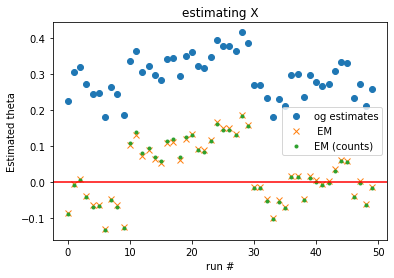

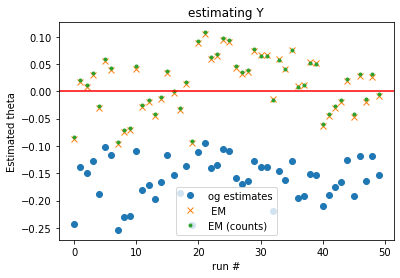

In [19]:
#do two qubit DA here and bootstrapping
#load 2q data
#2 qubit data analysis with the real run @th=0
from scipy import stats
ii=complex(0,1)
#number of repitions for the training 
nrand=20
#decoherence
p=0.5
th=0
#no of shots 
shots=8192
shotseff=shots/2
#estimator coefficients
chiX1 = 1/(1-p);
chiX2 = (3**(0.5)-1)/(2*(1-p));
chiX3 = -(3**(0.5)+1)/(2*(1-p));
chiX4 = 0;
chiY1 = -1/(1-p);
chiY2 = (3**(0.5)+1)/(2*(1-p));
chiY3 = (1-3**(0.5))/(2*(1-p));
chiY4 = 0;

#folder='AQTION_Calibration_Runs_2021-08-26--27/'
# folder='AQTION_1QY_2Q_2021-11-03/'
# folder2='_2Q_2021-11-03_LR'
folder='AQTION__2Q_2021-11-06/'
folder2='_2Q_2021-11-06_LR'
#folder2='_2Q_2021-11-06_LR_2nd_run'
cname='aqtion'

thvec=np.linspace(-0.2,0.2,nrand)
estx1=[]
estx1og=[]
estx2=[]
esty1=[]
esty1og=[]
esty2=[]


#low and high set the percentiles above and below which you throw away data, which you don't want to include in your training model 
low=10
high=100-low

msexb4C=[]
msexC=[]
mseyb4C=[]
mseyC=[]
#calculate the mean MSE over a certain range close to 0
msexb4=[]
msex=[]
mseyb4=[]
msey=[]

n1save=[]
n2save=[]
n3save=[]
n4save=[]

interceptsaveX=[]
interceptsaveY=[]

noions=[]

nxfitvec=[]
nyfitvec=[]

n1fitvec=[]
n2fitvec=[]
n3fitvec=[]
n4fitvec=[]

cheatingxvec=[]
cheatingyvec=[]
for hh in range(5):
        #generating theoretical data to fit the noisy data to
    
        
        
    F = np.load(str(folder+cname+folder2+str("/")+str('run')+str(hh)+str("_2Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("training_data")+str('1j')+str(".npz")))
    a=F['arr_0']

    n1=np.transpose(a)[0]
    n2=np.transpose(a)[1]
    n3=np.transpose(a)[2]
    n4=np.transpose(a)[3]
    #just need training data saved for later fittings
    n1T=n1
    n2T=n2
    n3T=n3
    n4T=n4
    total_ions=np.mean(np.array(n1)+np.array(n2)+np.array(n3)+np.array(n4))
    noisy2QX=[]
    noisy2QY=[]
    noisy2QX=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4)*(1/4096)
    noisy2QY=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4)*(1/4096)

    True2QX=[]
    True2QY=[]
    n1theory=[]
    n2theory=[]
    n3theory=[]
    
    n4theory=[]
    for jj in range(nrand):
        thint=thvec[jj]

        True2QX.append(thint)
        True2QY.append(thint)

        n1theory.append(total_ions*(0.2708333-0.0208333*math.cos(thint)+0.0208333*math.cos(3*thint)-0.17*math.sin(thint)+0.17*math.cos(thint)*math.sin(thint)))
        n2theory.append(total_ions*(0.28436498+0.010416666*math.cos(thint)-0.0180421959121*math.cos(2*thint)-0.010416666*math.cos(3*thint)+0.00451054*math.cos(4*thint)+0.2276709006*math.sin(thint)+0.06100423396*math.cos(thint)*math.sin(thint)))
        n3theory.append(total_ions*(0.25730168+0.0104166666*math.cos(thint)+0.0180421959*math.cos(2*thint)-0.010416666*math.cos(3*thint)-0.0045105589*math.cos(4*thint)-0.061004234*math.sin(th)-0.2276709*math.cos(thint)*math.sin(thint)))
        n4theory.append(total_ions*(0.1875))
        
    #outlier removal before regression
    datax=-np.array(True2QX)+noisy2QX
    datay=-np.array(True2QY)+noisy2QY

    iqrx=stats.iqr(datax, axis=0)
    iqry=stats.iqr(datay, axis=0)


    q1x=np.percentile(datax,low)
    q3x=np.percentile(datax,high)
    q1y=np.percentile(datay,low)
    q3y=np.percentile(datay,high)
    lower_rangex=q1x-(1.5*iqrx)
    upper_rangex=q3x+(1.5*iqrx)
    lower_rangey=q1y-(1.5*iqry)
    upper_rangey=q3y+(1.5*iqry)

    iremx=[i for i in range(len(datax)) if datax[i] > upper_rangex or datax[i] < lower_rangex]
    iremy=[i for i in range(len(datay)) if datay[i] > upper_rangey or datay[i] < lower_rangey]

    noisy2QX=datax[ (datax < upper_rangex) & (datax > lower_rangex) ]
    noisy2QY=datay[ (datay < upper_rangey) & (datay > lower_rangey) ]


    for index in sorted(iremx, reverse=True):
        del True2QX[index]
    for index in sorted(iremy, reverse=True):
        del True2QY[index]

    noisy2QX=noisy2QX+True2QX
    noisy2QY=noisy2QY+True2QY

    #after removing outliers calculate the mean offset, and use this as the correction term
    nxfit=np.mean(True2QX-noisy2QX)
    nyfit=np.mean(True2QY-noisy2QY)

    interceptsaveX.append(nxfit)
    interceptsaveY.append(nyfit)
    #now use this fit to correct the real data @th=0
    R00 = np.load(str(folder+cname+folder2+str("/")+str('run')+str(hh)+str("_2Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("n00vec")+str(".npz")))
    r00=R00['arr_0']
    R01 = np.load(str(folder+cname+folder2+str("/")+str('run')+str(hh)+str("_2Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("n01vec")+str(".npz")))
    r01=R01['arr_0']
    R10 = np.load(str(folder+cname+folder2+str("/")+str('run')+str(hh)+str("_2Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("n10vec")+str(".npz")))
    r10=R10['arr_0']
    R11 = np.load(str(folder+cname+folder2+str("/")+str('run')+str(hh)+str("_2Q_est")+str('th=')+str(th)+str('p=')+str(p)+str("/")+str("n11vec")+str(".npz")))
    r11=R11['arr_0']


    n1=np.transpose(r00)
    n2=np.transpose(r01)
    n3=np.transpose(r10)
    n4=np.transpose(r11)
    
    n1save.append(n1)
    n2save.append(n2)
    n3save.append(n3)
    n4save.append(n4)
    
    total_ions=np.mean(np.array(n1)+np.array(n2)+np.array(n3)+np.array(n4))
    noions.append(total_ions)
    
    noisy2QX=[]
    noisy2QY=[]
    noisy2QX=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4)*(1/total_ions)
    noisy2QY=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4)*(1/total_ions)
    updated2QX=np.array(noisy2QX)+nxfit
    updated2QY=np.array(noisy2QY)+nyfit
#     updated2QX=np.array(noisy2QX)-np.mean(noisy2QX)
#     updated2QY=np.array(noisy2QY)-np.mean(noisy2QY)
    
    estx1.append(updated2QX)
    esty1.append(updated2QY)
    estx1og.append(noisy2QX)
    esty1og.append(noisy2QY)
    for hh in range(10):
        msexb4.append((noisy2QX[hh])**2)
        msex.append((updated2QX[hh])**2)
        mseyb4.append((noisy2QY[hh])**2)
        msey.append((updated2QY[hh])**2)
        nxfitvec.append(nxfit)
        nyfitvec.append(nyfit)





    n1theory0=(total_ions*(0.2708333-0.0208333*math.cos(thint)+0.0208333*math.cos(3*thint)-0.17*math.sin(thint)+0.17*math.cos(thint)*math.sin(thint)))
    n2theory0=(total_ions*(0.28436498+0.010416666*math.cos(thint)-0.0180421959121*math.cos(2*thint)-0.010416666*math.cos(3*thint)+0.00451054*math.cos(4*thint)+0.2276709006*math.sin(thint)+0.06100423396*math.cos(thint)*math.sin(thint)))
    n3theory0=(total_ions*(0.25730168+0.0104166666*math.cos(thint)+0.0180421959*math.cos(2*thint)-0.010416666*math.cos(3*thint)-0.0045105589*math.cos(4*thint)-0.061004234*math.sin(th)-0.2276709*math.cos(thint)*math.sin(thint)))
    n4theory0=(total_ions*(0.1875))


    n1fit=np.mean(n1theory-n1T)
    n2fit=np.mean(n2theory-n2T)
    n3fit=np.mean(n3theory-n3T)
    n4fit=np.mean(n4theory-n4T)

    n1cor=np.array(n1)+n1fit
    n2cor=np.array(n2)+n2fit
    n3cor=np.array(n3)+n3fit
    n4cor=np.array(n4)+n4fit


    corrected2QX=(chiX1*n1cor+chiX2*n2cor+chiX3*n3cor+chiX4*n4cor)*(1/total_ions)
    corrected2QY=(chiY1*n1cor+chiY2*n2cor+chiY3*n3cor+chiY4*n4cor)*(1/total_ions)

    #mean MSE based on counts
    estx2.append(corrected2QX)
    esty2.append(corrected2QY)
    for hh in range(10):
        msexb4C.append((noisy2QX[hh])**2)
        msexC.append((corrected2QX[hh])**2)
        mseyb4C.append((noisy2QY[hh])**2)
        mseyC.append((corrected2QY[hh])**2)
        n1fitvec.append(n1fit)
        n2fitvec.append(n2fit)
        n3fitvec.append(n3fit)
        n4fitvec.append(n4fit)

    
print('MSE with error mitigating on angles')
print('mse in x before correction',np.mean(msexb4))
print('mse in x after correction',np.mean(msex))
print('mse in y before correction',np.mean(mseyb4))
print('mse in y after correction',np.mean(msey))


print()
print('MSE with error mitigating on counts')
print('mse in x before correction',np.mean(msexb4C))
print('mse in x after correction',np.mean(msexC))
print('mse in y before correction',np.mean(mseyb4C))
print('mse in y after correction',np.mean(mseyC))

print()
Cn=(2-p+0.5*p**2)/(1-p)**2
print('theoretical minimum MSE',Cn/(total_ions))
print('observed mse',np.mean(msey)+np.mean(msex))
print('observed mse no EM',np.mean(mseyb4)+np.mean(msexb4))

estx1og=np.reshape(estx1og,[50,1])
estx1=np.reshape(estx1,[50,1])
estx2=np.reshape(estx2,[50,1])
esty1og=np.reshape(esty1og,[50,1])
esty1=np.reshape(esty1,[50,1])
esty2=np.reshape(esty2,[50,1])

plt.plot(estx1og,'o')
plt.plot(estx1,'x')
plt.plot(estx2,'.')
plt.axhline(0, color='r', linestyle='-')
plt.legend(['og estimates',' EM','EM (counts)'])
plt.title('estimating X')
plt.ylabel('Estimated theta')
plt.xlabel('run #')

plt.figure(2)
plt.plot(esty1og,'o')
plt.plot(esty1,'x')
plt.plot(esty2,'.')
plt.axhline(0, color='r', linestyle='-')
plt.legend(['og estimates',' EM','EM (counts)'])
plt.title('estimating Y')
plt.ylabel('Estimated theta')
plt.xlabel('run #')

print()
print('# of ions',noions)

In [20]:
n1save=np.reshape(n1save,[1,50])
n2save=np.reshape(n2save,[1,50])
n3save=np.reshape(n3save,[1,50])
n4save=np.reshape(n4save,[1,50])
interceptsaveX=np.mean(interceptsaveX)
interceptsaveY=np.mean(interceptsaveY)

print(np.size(n1fitvec))

50


### re-evaluating 2 ion data with 503 ions

In [21]:
#using the new n1 and n0 for x we can now group into sets of 512 ions 
ions=np.mean(n1save+n2save+n3save+n4save)
print(ions)


estxog=[]
estxmit=[]
estxmitC=[]
estyog=[]
estymit=[]
estymitC=[]
mseog=[]
msemit=[]
msemitC=[]
mseXog=[]
mseXmit=[]
mseYog=[]
mseYmit=[]


msealtX=[]
msealtXOG=[]
msealtY=[]
msealtYOG=[]
msealt=[]
msealtC=[]
msealtOG=[]

grouping=8;
ions_group=np.round(ions/grouping)
print(ions_group)

for hh in range(np.size(nxfitvec)):
    n1=n1save[0][hh]
    n2=n2save[0][hh]
    n3=n3save[0][hh]
    n4=n4save[0][hh]
    
    estxint=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4)*(1/ions)
    estyint=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4)*(1/ions)
    
    estxog.append(estxint)
    estxmit.append(estxog[hh]+nxfitvec[hh])
    #estxmit.append(estxint-cheatingxvec[hh])
    
    estyog.append(estyint)
    estymit.append(estyog[hh]+nyfitvec[hh])
    #estymit.append(estyint-cheatingyvec[hh])
    
    mseXog.append(estxog[hh]**2)
    mseXmit.append(estxmit[hh]**2)
    
    mseYog.append(estyog[hh]**2)
    mseYmit.append(estymit[hh]**2)
    
    mseog.append(estxog[hh]**2+estyog[hh]**2)
    msemit.append(estxmit[hh]**2+estymit[hh]**2)
    
    #alt way of doing em from above
    n1cor=n1+n1fitvec[hh]
    n2cor=n2+n2fitvec[hh]
    n3cor=n3+n3fitvec[hh]
    n4cor=n4+n4fitvec[hh]

    estxC=(chiX1*n1cor+chiX2*n2cor+chiX3*n3cor+chiX4*n4cor)*(1/ions)
    estyC=(chiY1*n1cor+chiY2*n2cor+chiY3*n3cor+chiY4*n4cor)*(1/ions)
    
    msemitC.append(estxC**2+estyC**2)
    
    for outside in range(300):
        
        data1=np.ones(int(ions))
        data1[:int(n1)] = 0
        data1[int(n1):int(n1)+int(n2)] = 2
        data1[int(n2)+int(n1):int(n3)+int(n2)+int(n1)] = 3
        np.random.shuffle(data1)

        for groupcount in range(grouping):
            
            dataint=data1[int(groupcount*ions_group):int((groupcount+1)*ions_group)]

            n1t=np.count_nonzero(dataint==0)
            n2t=np.count_nonzero(dataint==2)
            n3t=np.count_nonzero(dataint==3)
            n4t=np.count_nonzero(dataint==1)

            thx=(chiX1*n1t+chiX2*n2t+chiX3*n3t+chiX4*n4t)*(1/ions_group)
            thy=(chiY1*n1t+chiY2*n2t+chiY3*n3t+chiY4*n4t)*(1/ions_group)

            thx2=nxfitvec[hh]+thx
            thy2=nyfitvec[hh]+thy
#             thx2=-cheatingxvec[hh]+thx
#             thy2=-cheatingyvec[hh]+thy
            
            n1cor=n1t+n1fitvec[hh]/grouping
            n2cor=n2t+n2fitvec[hh]/grouping
            n3cor=n3t+n3fitvec[hh]/grouping
            n4cor=n4t+n4fitvec[hh]/grouping
            
            thx3=(chiX1*n1cor+chiX2*n2cor+chiX3*n3cor+chiX4*n4cor)*(1/ions_group)
            thy3=(chiY1*n1cor+chiY2*n2cor+chiY3*n3cor+chiY4*n4cor)*(1/ions_group)

            msealt.append((thx2-th)**2+(thy2-th)**2)
            msealtOG.append((thx-th)**2+(thy-th)**2)
            msealtC.append((thx3-th)**2+(thy3-th)**2)

            msealtX.append((thx2-th)**2)
            msealtY.append((thy2-th)**2)
            
    

print(np.mean(mseog))
print(np.mean(msemit))
print(np.mean(msemitC))
Cn2=2*(2-p+0.5*p**2)/(((1-p)**2)*2);
Cn=(1)/(1-p)**2
print('theoretical minimum MSE',Cn2/(ions))
print()
print('mse in x using 503 ions')
print('x',np.mean(msealtX))
print('x og',np.mean(msealtXOG))
print('y',np.mean(msealtY))
print('y og',np.mean(msealtYOG))
print()
print('x+y',np.mean(msealt))
print('x+y og',np.mean(msealtOG))
print('x+y C',np.mean(msealtC))
print('theoretical minimum MSE',Cn2/(ions_group))
print('theoretical minimum MSE 1q',2*Cn/(ions_group))

4091.0
511.0
0.11667305060186309
0.010415337113770984
0.010611193072574044
theoretical minimum MSE 0.0015888535810315327

mse in x using 503 ions
x 0.0126738011614075
x og nan
y 0.008471511997034087
y og nan

x+y 0.021145313158441592
x+y og 0.12740721351404136
x+y C 0.021339138246882567
theoretical minimum MSE 0.012720156555772993
theoretical minimum MSE 1q 0.015655577299412915


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## bootstrapping 2 ion data

In [19]:
#bootstrapping
print("2 qubit bootstrapping:")

NT=sum(n1save[0])+sum(n2save[0])+sum(n3save[0])+sum(n4save[0])
N1=sum(n1save[0])
N2=sum(n2save[0])
N3=sum(n3save[0])
N4=sum(n4save[0])
p1=N1/NT
p2=N2/NT
p3=N3/NT
p4=N4/NT
totI=NT/50
print('total ions og',totI)

mseTMA=[]
mseTMAog=[]

mseTMA2=[]
mseTMAog2=[]

for hh in range(1000):

    mseintMA=[]
    mseintMAog=[]
    
    mseintMA2=[]
    mseintMAog2=[]
    
   
    for kk in range(50):
        rv= np.random.multinomial(totI, [p1,p2,p3,p4], size=1)
        
        n1=rv[0][0]
        n2=rv[0][1]
        n3=rv[0][2]
        n4=rv[0][3]
        
        estXog=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4)*(1/totI)
        estYog=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4)*(1/totI)
        
        estX=estXog+interceptsaveX
        estY=estYog+interceptsaveY

        mseintMA.append((estX-th)**2+(estY-th)**2)
        mseintMAog.append((estXog-th)**2+(estYog-th)**2)
        
    for kk in range(50*grouping):
        rv= np.random.multinomial(ions_group, [p1,p2,p3,p4], size=1)
        
        n1=rv[0][0]
        n2=rv[0][1]
        n3=rv[0][2]
        n4=rv[0][3]
        
        estXog=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4)*(1/ions_group)
        estYog=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4)*(1/ions_group)
        
        estX=estXog+interceptsaveX
        estY=estYog+interceptsaveY

        mseintMA2.append((estX-th)**2+(estY-th)**2)
        mseintMAog2.append((estXog-th)**2+(estYog-th)**2)

        

    mseTMA.append(np.mean(mseintMA))
    mseTMAog.append(np.mean(mseintMAog))
    
    mseTMA2.append(np.mean(mseintMA2))
    mseTMAog2.append(np.mean(mseintMAog2))
    
print("EM mse  ",np.mean(mseTMA),"+/-",np.var(mseTMA)**0.5)
print("OG mse  ",np.mean(mseTMAog),"+/-",np.var(mseTMAog)**0.5)

print()
print('500 ish ion data')
    
print("EM mse ",np.mean(mseTMA2),"+/-",np.var(mseTMA2)**0.5)
print("OG mse  ",np.mean(mseTMAog2),"+/-",np.var(mseTMAog2)**0.5)

2 qubit bootstrapping:
total ions og 4091.0
EM mse without slope  0.0024923718260486333 +/- 0.00031133211899566076
OG mse without slope  0.11335339476195458 +/- 0.0027460731728723028

500 ish ion data
EM mse without slope  0.013274797861995603 +/- 0.0006475485863074424
OG mse without slope  0.12412434442270058 +/- 0.0027984006263921187
